In [52]:
import math
import torch
import numpy as np
from torch import nn
from d2l import torch as d2l
from train_epoch import train_ch3

In [53]:
max_degree = 20
n_train, n_test = 100, 100
true_w = np.zeros(max_degree)
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])

features = np.random.normal(size=(n_train + n_test, 1))
np.random.shuffle(features)
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))
for i in range(max_degree):
    poly_features[:, i] /= math.gamma(i + 1)
labels = np.dot(poly_features, true_w)
labels += np.random.normal(scale=0.01, size=labels.shape)

In [54]:
true_w, features, poly_features, labels = [torch.tensor(x, dtype=torch.float32) for x in [true_w, features, poly_features, labels]]

In [55]:
features, poly_features, labels

(tensor([[ 0.2636],
         [-0.5385],
         [-0.0740],
         [-0.1861],
         [ 0.4985],
         [ 1.6485],
         [-1.2234],
         [-1.1601],
         [-2.0378],
         [ 0.0707],
         [ 0.8912],
         [ 1.2426],
         [-0.6316],
         [-1.0264],
         [-1.3280],
         [-0.8882],
         [ 0.1515],
         [-0.1755],
         [ 0.7746],
         [ 0.4895],
         [ 1.5500],
         [-0.4820],
         [ 0.8354],
         [ 0.0212],
         [-0.2811],
         [-1.0387],
         [ 0.6622],
         [-0.0236],
         [ 0.3447],
         [ 1.6755],
         [ 0.5883],
         [-0.0846],
         [-0.7101],
         [ 2.1539],
         [ 0.2936],
         [-0.0813],
         [ 1.4313],
         [ 1.1204],
         [-0.0345],
         [-0.0550],
         [ 1.2987],
         [-1.9260],
         [-1.2959],
         [-0.3249],
         [-0.6977],
         [ 2.2398],
         [ 0.9211],
         [-0.2753],
         [-1.3929],
         [ 0.3182],


In [61]:
def evaluate_loss(net, data_iter, loss):
    metric = d2l.Accumulator(2)
    for X, y in data_iter:
        out  = net(X)
        y = y.reshape(out.shape)
        l = loss(out, y)
        metric.add(l.sum(), l.numel())
    return metric[0] / metric[1]

In [64]:
def train(train_features, test_features, train_labels, test_labels, num_epochs = 400):
    loss = nn.MSELoss(reduction='none')
    input_shape = train_features.shape[-1]
    net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
    batch_size = min(10, train_labels.shape[0])
    train_iter = d2l.load_array((train_features, train_labels.reshape(-1, 1)), batch_size)
    test_iter = d2l.load_array((test_features, test_labels.reshape(-1, 1)), batch_size)
    trainer = torch.optim.SGD(net.parameters(), lr=0.01)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss',yscale='log', xlim=[1, num_epochs], ylim=[1e-3, 1e2],legend=['train', 'test'])
    for epoch in range(num_epochs):
        train_ch3.train_epoch_ch3(net, train_iter, loss,trainer)
        if epoch ==0 or epoch % 20 == 0:
            animator.add(epoch+1, (evaluate_loss(net, train_iter, loss),evaluate_loss(net, test_iter, loss)))
    print('weight:', net[0].weight.data.numpy())

weight: [[ 4.995404   1.2540665 -3.3903384  5.469853 ]]


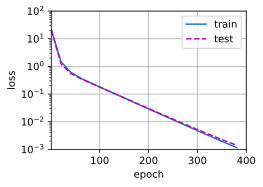

In [65]:
train(poly_features[:n_train, :4], poly_features[n_train:, :4],labels[:n_train],labels[n_test:])

weight: [[3.6295583 3.323572 ]]


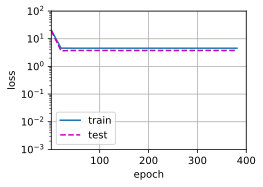

In [66]:
train(poly_features[:n_train, :2], poly_features[n_train:, :2],labels[:n_train],labels[n_test:])

weight: [[ 4.9801607   1.2489592  -3.28221     5.252767   -0.42061615  1.3725183
   0.22047812  0.19721927 -0.2084523  -0.0386093   0.18045092 -0.00885976
  -0.21168049  0.17881273 -0.10281437 -0.15120378  0.1783534  -0.14688724
   0.08653602 -0.08378756]]


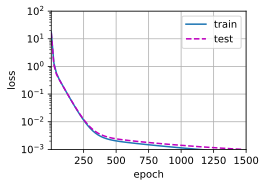

In [67]:
train(poly_features[:n_train, :], poly_features[n_train:, :],
      labels[:n_train], labels[n_train:], num_epochs=1500)